# 1) Import the dataset from sklearn. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [37]:
mnist=datasets.load_digits()

# 2) Save X(features) and y(target) as dataframes.

In [4]:
x=pd.DataFrame(np.array(mnist.data))
y=pd.DataFrame(mnist.target)


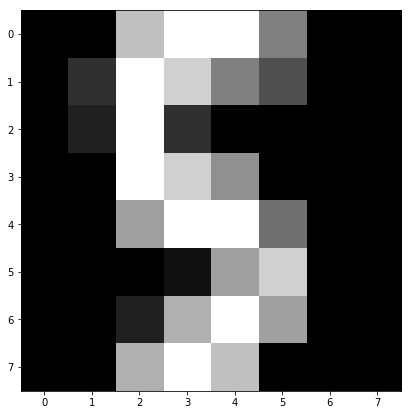

Target:  5


In [10]:
plt.figure(figsize=(7, 7))
idx = 102
grid_data = np.reshape(mnist.data[idx:idx+1], (8,8))
plt.imshow(grid_data, cmap='gray')
plt.show()

print('Target: ',mnist.target[idx])


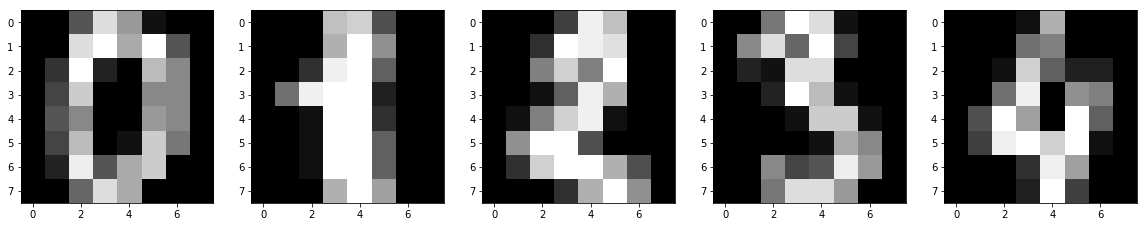

In [11]:
plt.figure(figsize = (20,4))
for index , (image,label) in enumerate(zip(mnist.data[0:5] , mnist.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image , (8,8)) , cmap = plt.cm.gray)

# 3) Split the dataset into training and testing sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target,test_size = 0.25,random_state = 0)

# 4) Use Logistic Regression.

In [13]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
score = classifier.score(X_test, y_test)
print(score)

0.9533333333333334


# 5a. Classification accuracy

In [25]:
metrics.accuracy_score(y_test,y_pred)

0.9533333333333334

In [39]:
kfold = model_selection.KFold(n_splits=10, random_state=1)
res1 = model_selection.cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
print("%.3f"%(res1.mean()*100))

96.363


# 5b. Logarithmic loss

In [55]:
res = model_selection.cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='neg_log_loss')
print(res.mean()*100)
#metrics.log_loss(y_test,y_pred)

-18.973035605610683


   # 5c. R2 Metrics

In [36]:
res3 = model_selection.cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='r2')
print(res3.mean()*100)

90.89541123356962


# 5d. Mean absolute error


In [42]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  0.2


# 5e. Mean squared error


In [41]:
print('Root Mean Squared Error: ',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  1.1155555555555556
Root Mean Squared Error:  1.0561986345169907


# 5f. Confusion matrix

In [27]:
con_metrics=metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 45,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]], dtype=int64)

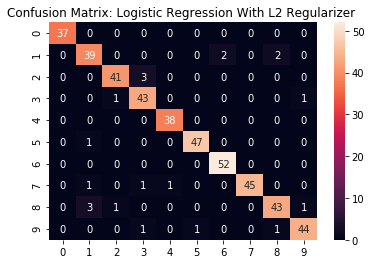

In [30]:
sns.heatmap(con_metrics,annot=True,fmt='d')
plt.title("Confusion Matrix: Logistic Regression With L2 Regularizer ")
plt.show()

# 5g. Classification report


In [31]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450

